In [1]:
from helpers import *

# Neural Network Architecture
class RGBtoHSVNet(nn.Module):
    def __init__(self):
        super(RGBtoHSVNet, self).__init__()
        self.fc1 = nn.Linear(3, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 3)
        
    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

In [2]:
random_rgb = generate_rgb_samples(1000)
random_hsv = rgb_to_hsv(random_rgb)

# Plot the colors in 3D space
#plot_colors_3d(random_rgb, random_rgb, title="RGB Random Colors in 3D Space")
#plot_colors_3d(random_hsv, random_rgb, title="HSV Random Colors in 3D Space")

# Initialize model
random_model = RGBtoHSVNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(random_model.parameters(), lr=0.001)

# print("Model architecture:")
# print(model)

training_losses, trained_model = train_model(random_model, random_rgb, random_hsv, num_epochs=100, verbose=True)

Epoch [20/100], Loss: 0.008369
Epoch [40/100], Loss: 0.005141
Epoch [60/100], Loss: 0.003608
Epoch [80/100], Loss: 0.002773
Epoch [100/100], Loss: 0.002229
Training completed!


In [3]:
random_activations = capture_activations(random_model, random_rgb)

Indices of nearest neighbors: [712 229 963 642 851 495 544 383 304  62 145 221 711 717 747]


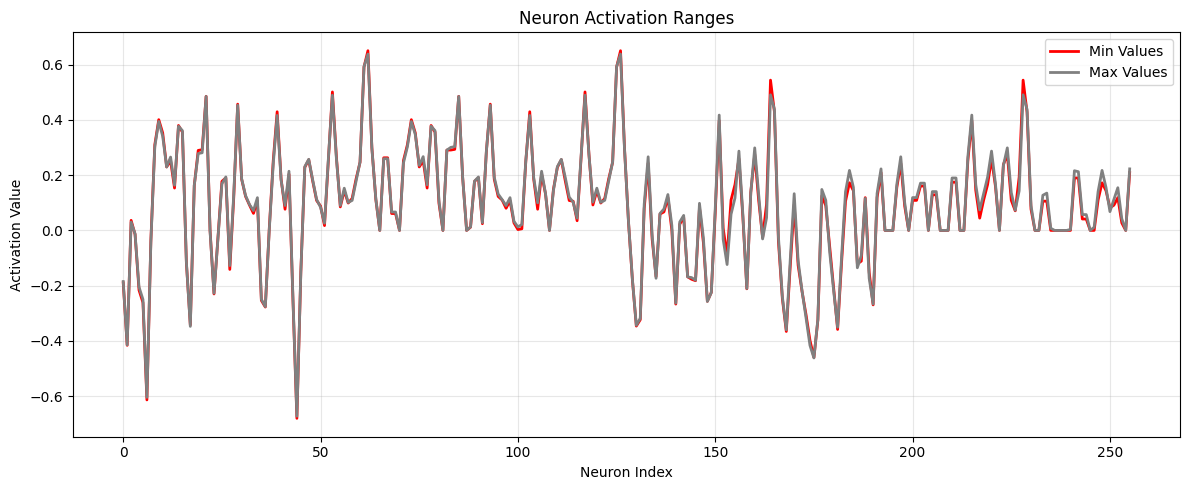

In [66]:
rgb_red = np.array([[0.5, 0.5, 0.5]])  # Red in RGB
red_activation = capture_activations(random_model, rgb_red)

indices, distances  = find_knn(rgb_red, random_rgb, k=15, metric='l2')
print(f"Indices of nearest neighbors: {indices}")
blended_act, _ = inverse_distance_weighted_activations(random_activations, indices, distances)

weighted_activations = calc_weighted_distance(distances, indices, random_activations)

# Plot min/max values
plot_line_graphs([red_activation[0], weighted_activations], 
                colors=['red', 'gray'], 
                labels=['Min Values', 'Max Values', 'Middle Grey Activation', 'Red Activation'],
                title='Neuron Activation Ranges',
                smooth=True, smooth_window=2)

[[0.43313026 0.45785931 0.23247622 0.26355596 0.21747317 0.26102597
  0.33078618 0.27834238 0.32556369 0.30436418 0.29632536 0.34204275
  0.33718594 0.3182813  0.34457677 0.35584746 0.36414695 0.36354375
  0.40074521 0.42375674 0.40671379 0.38388071 0.37998749 0.37927116
  0.38067705 0.37473866 0.38044204 0.37957307 0.38844301 0.40166616
  0.39425537 0.39876469 0.39469465 0.39714378 0.39267771 0.4039398
  0.40480537 0.41760425 0.42307625 0.42154114 0.4327742  0.43046381
  0.42687457 0.43054046 0.43742903 0.44083116 0.45182355 0.46481042
  0.46095732 0.46837475]]


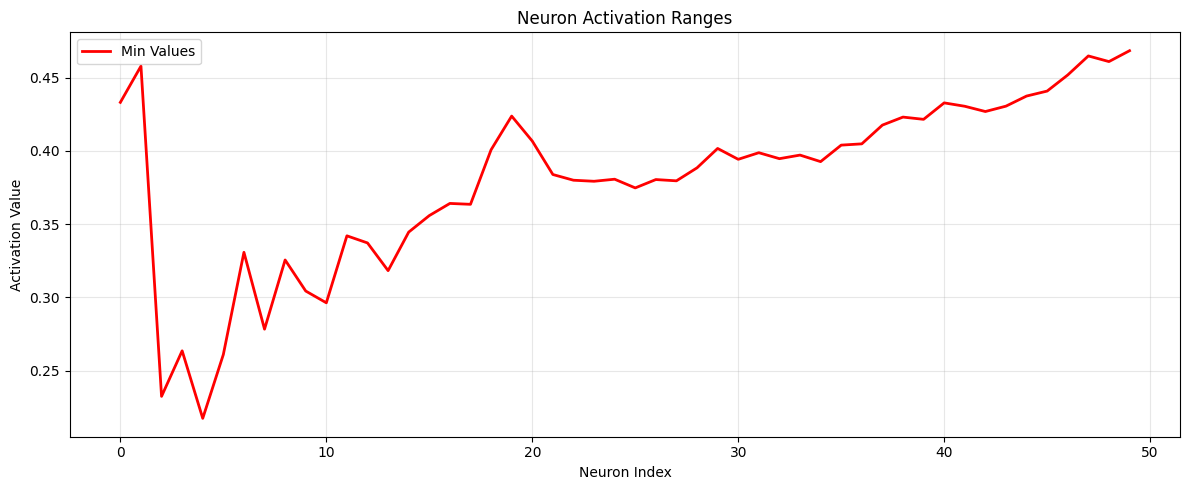

In [67]:
test_range = 50
array = np.zeros((test_range, 1))

for i in range(test_range):
    tmp_indices, tmp_distances  = find_knn(rgb_red, random_rgb, k=i+1, metric='l2')
    weighted_activations = calc_weighted_distance(tmp_distances, tmp_indices, random_activations)
    array[i] = np.linalg.norm(red_activation[0] - weighted_activations)

array = array.T    
print(array)

plot_line_graphs([array[0]], 
                colors=['red', 'gray'], 
                labels=['Min Values', 'Max Values', 'Middle Grey Activation', 'Red Activation'],
                title='Neuron Activation Ranges',
                smooth=False, smooth_window=15)

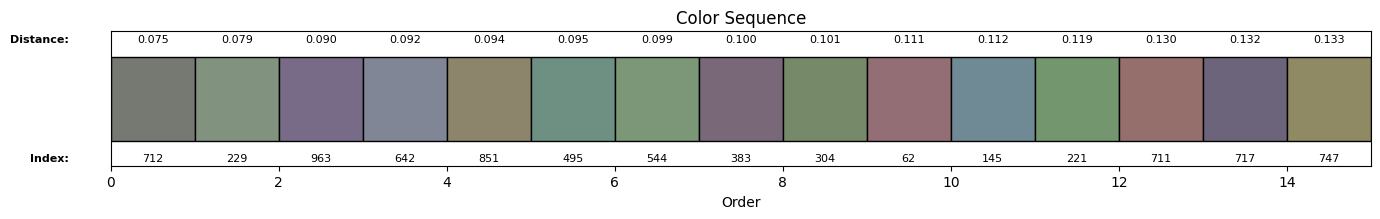

In [68]:
plot_color_sequence(random_rgb, indices, distances)

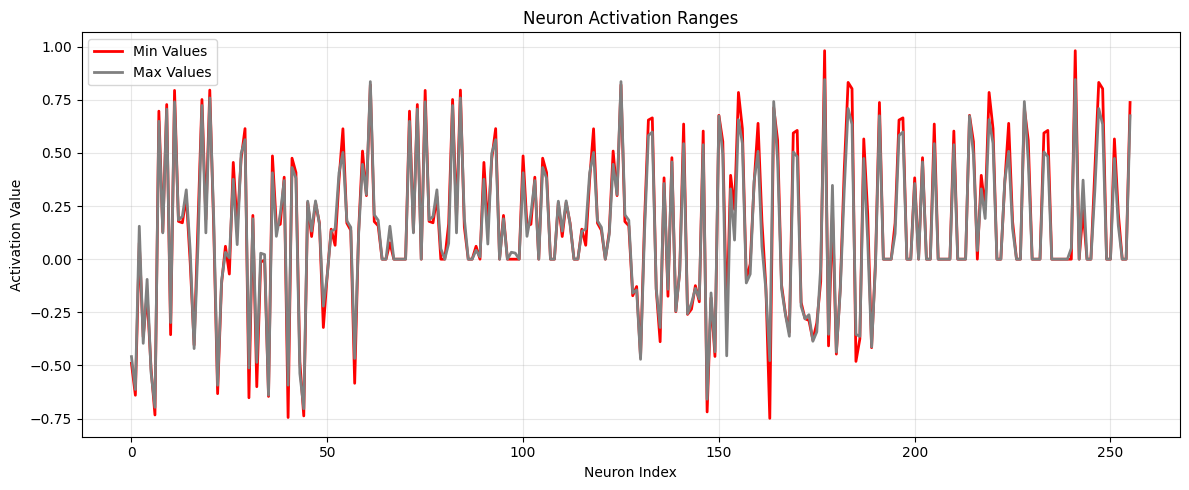

In [5]:
# Plot min/max values
plot_line_graphs([red_activation[0], weighted_activations], 
                colors=['red', 'gray'], 
                labels=['Min Values', 'Max Values', 'Middle Grey Activation', 'Red Activation'],
                title='Neuron Activation Ranges',
                smooth=False, smooth_window=15)